# fitting annihilation msr timeseries
Tim Tyree<br>
7.5.2022

In [2]:
from IPython.display import clear_output
clear_output(wait=True)

import sys,os
og_stdout=sys.stdout
from lib.my_initialization import *

os.chdir(nb_dir)
from lib import *

# import cupy, cudf
# from lib.rapids_func import *

import seaborn as sns
import matplotlib.ticker as mtick

import warnings
warnings.simplefilter("ignore", UserWarning)
%load_ext autoreload
%autoreload 2

In [11]:
#reset matplotlib settings
import matplotlib as mpl
sns.reset_orig()
mpl.rc_file_defaults()

# define module

# load data

In [57]:
#load spiral tip range time series from cache
#######################
# Luo-Rudy
#######################
#WJ's data for LR model (200x200)
range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_annihilation_range_timeseries.pkl'
# #my data for LR model (200x200) diffCoeff=0.001
range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_range_timeseries.pkl'
#my data for LR model (200x200) diffCoeff=0.0005
range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilation_range_timeseries.pkl'

#######################
# Fenton-Karma
#######################

# range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilation_range_timeseries.pkl'
range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_1/annihilation_range_timeseries.pkl'
range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilation_range_timeseries.pkl'
# range_data_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_30_diffCoef_0.001_dt_0.025/annihilation_range_timeseries.pkl'



data_lst=load_from_pickle(range_data_dir)
print(f"loaded range timeseries from {len(data_lst)} termination events")
df=pd.concat(data_lst)
del data_lst
df.head()

loaded range timeseries from 121 termination events


,annihilation_index,R,tdeath,t,n,x,y,theta,grad_ux,grad_uy,grad_vx,grad_vy,v,f,s,dvdt,dfdt,dsdt,frame,trial_num
128402,0,0.164647,0.0,6337.6,2,139.25086,14.67538,-9999.0,1.27159,-1.60766,1.18549,-0.72447,0.33009,0.08278,0.82304,0.00150,-0.00635,-0.00103,3962,0
128394,0,0.301292,1.6,6336.0,2,136.74600,13.23007,-9999.0,1.41938,-3.39372,1.15328,-0.52273,0.48249,0.08807,0.81961,-0.00233,-0.00676,-0.00102,3961,0
128386,0,0.371175,3.2,6334.4,2,135.25555,12.63090,-9999.0,1.43916,-3.73072,1.13168,-0.37129,0.34319,0.07559,0.81698,0.00154,-0.00580,-0.00102,3960,0
128378,0,0.420460,4.8,6332.8,2,134.05747,12.22597,-9999.0,1.48733,-4.34983,1.12795,-0.32156,0.37359,0.07828,0.81444,0.00075,-0.00601,-0.00102,3959,0
128370,0,0.462285,6.4,6331.2,2,132.97142,11.90594,-9999.0,1.71007,-7.03180,1.12826,-0.42371,0.40939,0.08221,0.81258,-0.00030,-0.00631,-0.00102,3958,0


# TODO: compute msr

In [58]:
x_values_in=df['tdeath'].values
y_values_in=df['R'].values**2
print(f"tdeath ranges from {np.min(x_values_in)} to {np.max(x_values_in)} ms")
print(f"R^2 ranges from {np.min(y_values_in)} to {np.max(y_values_in)} cm^2")

tdeath ranges from 0.0 to 1868.8 ms
R^2 ranges from 7.156250000075447e-11 to 12.330866687465315 cm^2


In [59]:
assert not np.isnan(x_values_in).any() 
assert not np.isnan(y_values_in).any()

In [60]:
#compute bootstrap 
# bins=np.arange(0,450,1)
# bins=np.arange(0,1800,5)
bins=np.arange(0,2800,5)
df_bootstrap=bin_and_bootstrap_xy_values_parallel(x_values_in,
                               y_values_in,
                               xlabel='tdeath_avg',
                               ylabel='MSR',
                               bins=bins,
                               min_numobs=10,
                               num_bootstrap_samples=1000,
                               npartitions=10,
                               use_test=False)
df_bootstrap.head()

,tdeath_avg,MSR,Delta_tdeath_avg,Delta_MSR,p_tdeath_avg,p_MSR,counts
0,2.302685,0.101907,0.017385,0.001099,0.596408,0.020035,37914
1,7.977174,0.215369,0.015636,0.002290,0.062441,0.917820,25445
2,12.780152,0.273737,0.016777,0.002968,0.961914,0.013977,24022
3,17.580277,0.324734,0.016321,0.003689,0.360833,0.293810,22715
4,22.377199,0.371408,0.018235,0.004455,0.473704,0.636188,21403


In [61]:
df_bootstrap.tail()

,tdeath_avg,MSR,Delta_tdeath_avg,Delta_MSR,p_tdeath_avg,p_MSR,counts
311,1556.800000,3.774760,0.747381,0.649430,0.604701,0.801924,12
312,1562.215385,3.781276,0.994753,0.650068,0.587286,0.005006,13
313,1602.400000,5.233339,1.001279,0.206936,0.330677,0.824348,12
314,1642.400000,5.249468,0.981707,0.954804,0.603401,0.644642,12
315,1682.400000,5.076051,1.023012,0.878101,0.143062,0.027473,12


In [62]:
x_values=df_bootstrap['tdeath_avg'].values
y_values=df_bootstrap['MSR'].values
yerr_values=df_bootstrap['Delta_MSR'].values
x_values.shape,y_values.shape,yerr_values.shape

((316,), (316,), (316,))

Does this appear to intersect at zero?


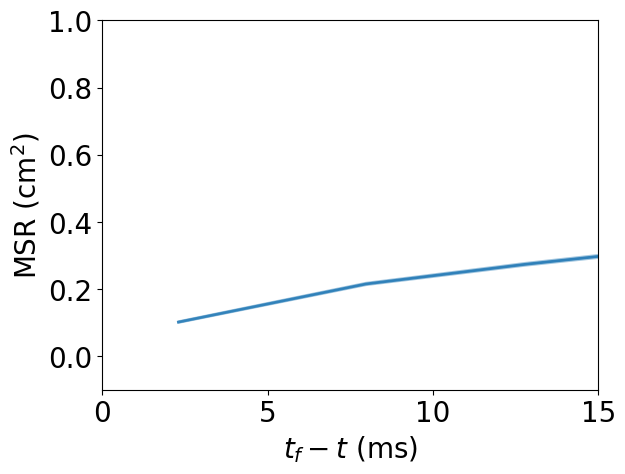

In [63]:
print(f"Does this appear to intersect at zero?")
c='C0'
plt.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
plt.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
format_plot(ax=plt.gca(),xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
# plt.xlim([0,180])
# plt.ylim([0,3.1])
plt.xlim([0,15])
plt.ylim([-.1,1])
plt.show()

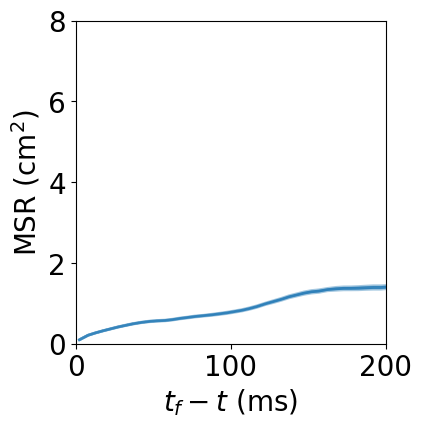

In [64]:
#plot expected
fig,ax=plt.subplots(figsize=(4,4.2))
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
ax.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
format_plot(ax=ax,xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
ax.set_xlim([0,200])
ax.set_ylim([0,8])
plt.show()

In [65]:
# range_data_dir

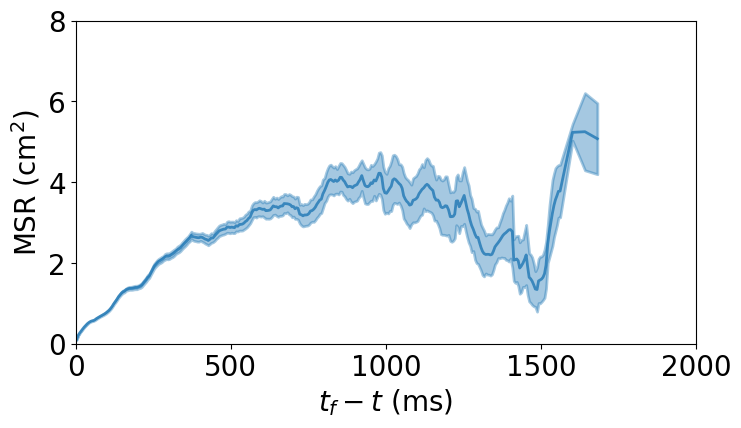

In [66]:
#plot expected
fig,ax=plt.subplots(figsize=(8,4.2))
# ax.plot(x_values,4*9.5*1e-3*x_values,'--',lw=2,alpha=0.8,c='C1')
# ax.plot(x_values,4*1.8*1e-3*x_values,'--',lw=2,alpha=0.8,c='C0')
#plot data
ax.plot(x_values,y_values,lw=2,alpha=0.8,c=c)
ax.fill_between(x_values,y_values-yerr_values,y_values+yerr_values,lw=2,alpha=0.4,color=c)
format_plot(ax=ax,xlabel=r'$t_f-t$ (ms)',ylabel=r'MSR (cm$^2$)')
ax.set_xlim([0,2000])
ax.set_ylim([0,8])
plt.show()

In [67]:
#save msr as .csv
msr_dir_bootstrap=range_data_dir.replace('annihilation_range_timeseries.pkl','annihilation_msr.csv')
df_bootstrap.to_csv(msr_dir_bootstrap,index=False)
print(f"{msr_dir_bootstrap=}")

msr_dir_bootstrap='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/annihilation_msr.csv'


In [49]:
#######################
# Luo-Rudy
#######################
#WJ's data for LR model (200x200)
# msr_dir_bootstrap='/home/timothytyree/Documents/GitHub/care/notebooks/Data/from_wjr/tippos_per_001_annihilation_msr.csv'
# #my data for LR model (200x200) diffCoeff=0.001
# msr_dir_bootstrap='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/ds_5_param_qu_tmax_30_Ko_5.4_diffCoef_0.001/annihilation_msr.csv'
# #my data for LR model (200x200) diffCoeff=0.0005
# msr_dir_bootstrap='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-suite-3-LR/param_qu_tmax_30_Ko_5.4_diffCoef_0.0005_dt_0.5/annihilation_msr.csv'


In [50]:
search_for_file()

File: /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.1_log.csv


'/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.1_log.csv'

In [2]:
#TODO: fit msr to analytical model solution to the affine oscillatory model, as before, except with period fixed
period=140 #ms

In [52]:
input_dir='/home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.1_log.csv'
input_folder=os.path.dirname(input_dir)
fn_lst=[os.path.join(input_folder,x) for x in sorted(os.listdir(input_folder)) if x.find('_log.csv')!=-1]
print(f"found {len(fn_lst)} files comparable to {fn_lst[0]}")


found 324 files comparable to /home/timothytyree/Documents/GitHub/care/notebooks/Data/initial-conditions-fk-200x200/param_set_8_ds_5.0_tmax_10_diffCoef_0.0005/Log/ic200x200.0.0_log.csv
